<a href="https://colab.research.google.com/github/yardboy27/ecen360/blob/main/intro_to_ds/case0/FirstPeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A sample data science project with the diabetes dataset

[Jian Tao](https://orcid.org/0000-0003-4228-6089), Texas A&M University

May 1, 2021

### The goal of this project is to build a model to predict disease progression.

Given a dataset, we will
1. explore the diabetes data set,
2. build a multilinear model with top 3 features that are closely correlated with the target,
3. create a Deep Neural Network with 3 hidden layers, and finally,
4. compare the models and discuss the results.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import os

### 1. First of all, load and explore the data

In [21]:
# we will load the diabetes data set distributed with sklearn.
diabetes = datasets.load_diabetes()

# load data into a Pandas DataFrame when you need to do EDA.
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

In [22]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target # only for plot the first figure.

In [23]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [26]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


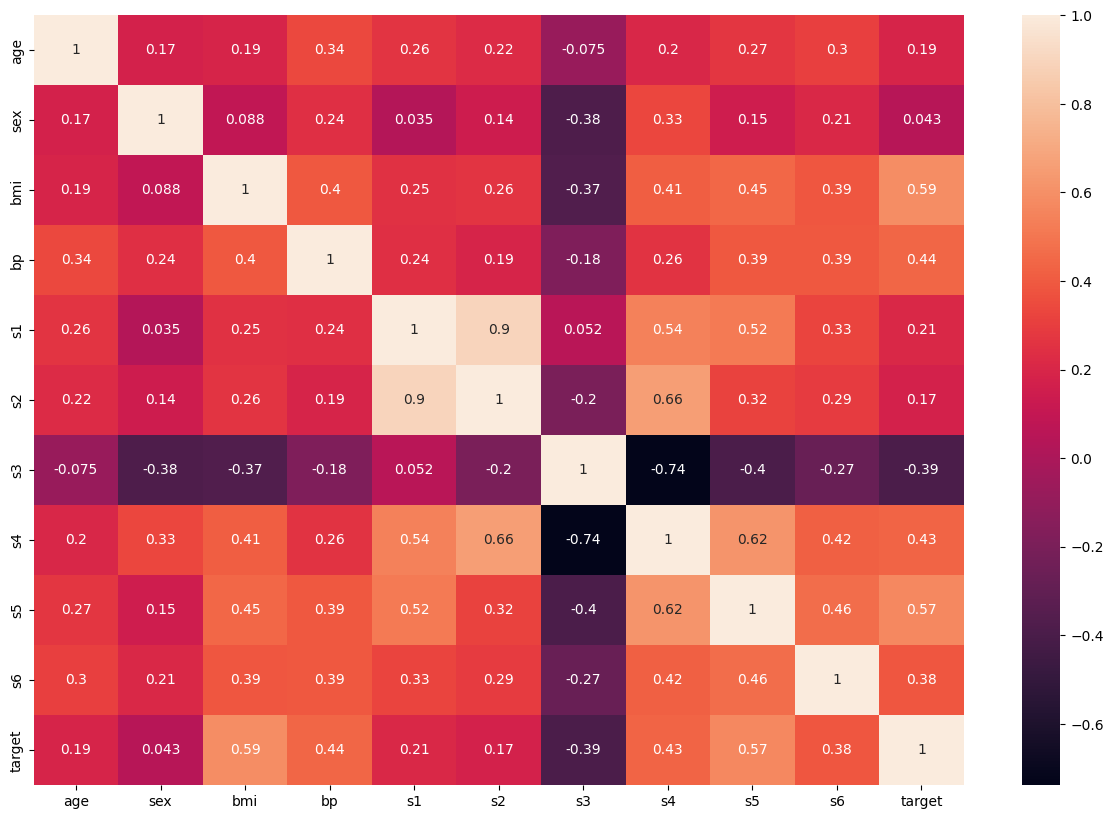

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

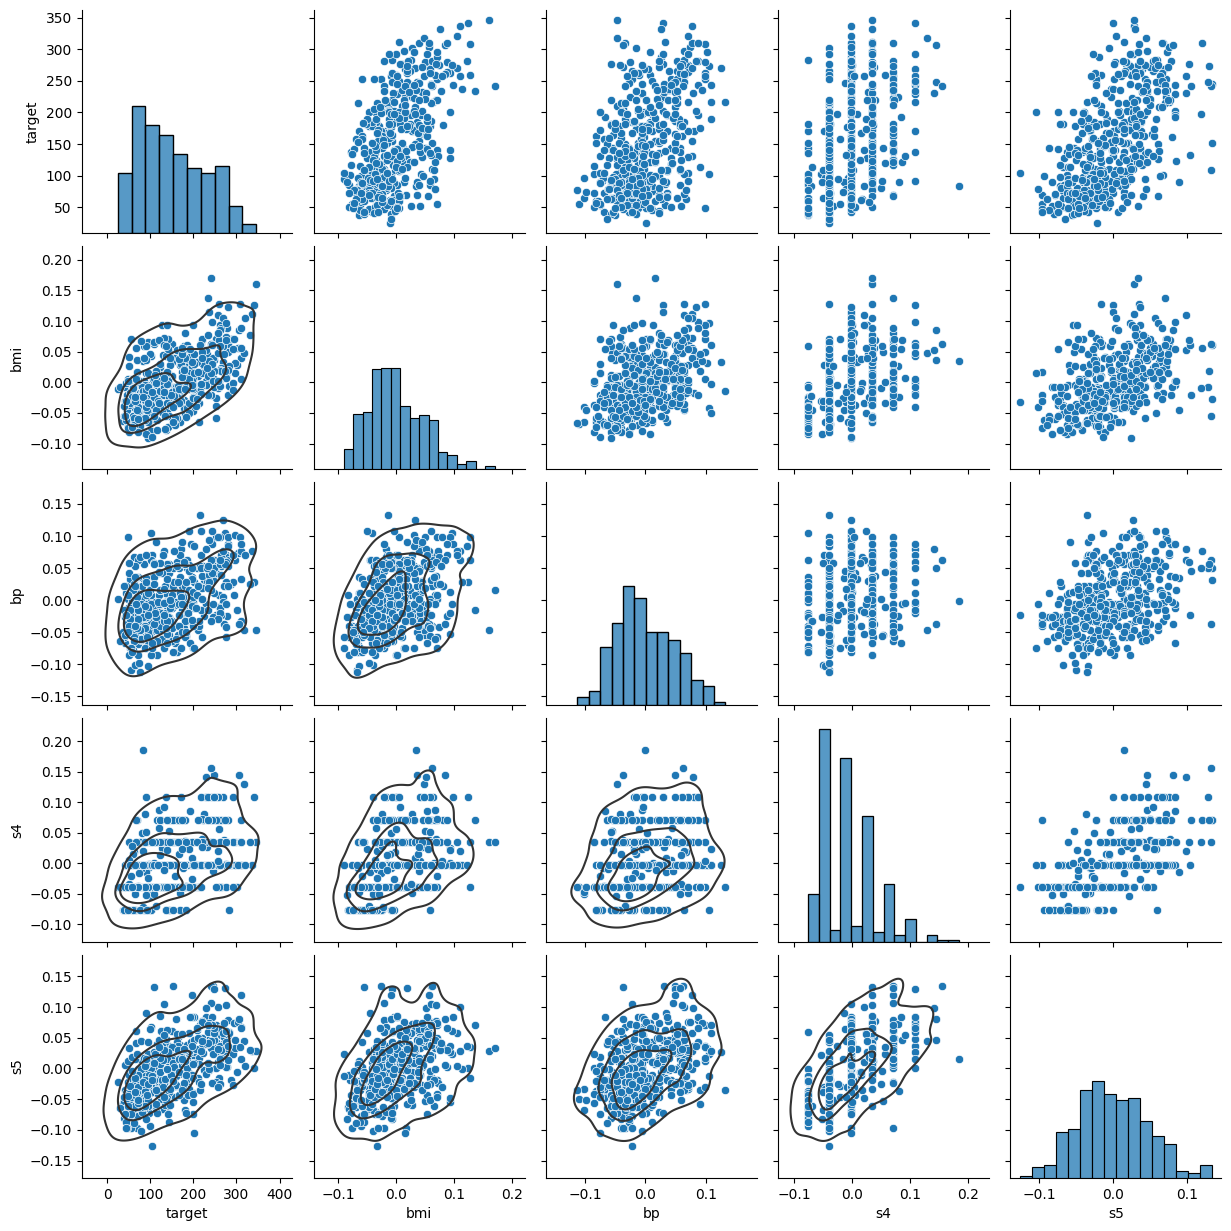

In [28]:
g = sns.pairplot(df[["target", "bmi", "bp", "s4", "s5"]])
g.map_lower(sns.kdeplot, levels=4, color=".2")

### 2. Build a multilinear regression model with top 3 correlated features
Top 3 features that are correlated with the target are bmi (0.59), s5 (0.57), and bp (0.44)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['bmi',"bp", "s5"]]
y = df[["target"]]

multi_reg = LinearRegression()
multi_reg.fit(X, y)

y_pred = multi_reg.predict(X)

print('Coefficients:', multi_reg.coef_)
print('MSE:', mean_squared_error(y, y_pred) )
print('R-sq:', r2_score(y, y_pred) )

Coefficients: [[603.07835741 262.27200281 543.87120586]]
MSE: 3083.0513432257203
R-sq: 0.48008243046470156


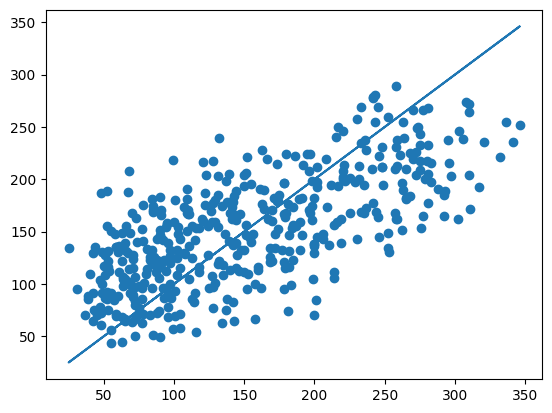

In [30]:
plt.scatter(y, y_pred)
plt.plot(y, y)

by summing the distance from each point to the line, you get the mean squared error.

we want to keep the order low

### 3. Build a Deep Neural Network with 3 hidden Dense layers with all the features.

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [32]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

In [33]:
X = df.drop("target", axis = 1)
y = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [34]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
198,-0.052738,-0.044642,0.054152,-0.026328,-0.055231,-0.033881,-0.013948,-0.039493,-0.074093,-0.059067
268,0.063504,0.050680,0.088642,0.070072,0.020446,0.037517,-0.050764,0.071210,0.029297,0.073480
209,0.038076,0.050680,-0.018062,0.066629,-0.051103,-0.016658,-0.076536,0.034309,-0.011897,-0.013504
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504
...,...,...,...,...,...,...,...,...,...,...
63,-0.034575,-0.044642,-0.037463,-0.060756,0.020446,0.043466,-0.013948,-0.002592,-0.030748,-0.071494
326,0.045341,0.050680,-0.008362,-0.033213,-0.007073,0.001191,-0.039719,0.034309,0.029935,0.027917
337,0.019913,0.050680,-0.012673,0.070072,-0.011201,0.007141,-0.039719,0.034309,0.005386,0.003064
11,0.027178,0.050680,0.017506,-0.033213,-0.007073,0.045972,-0.065491,0.071210,-0.096435,-0.059067


In [ ]:
# Neural network
model = Sequential()
model.add(Dense(12, input_dim=10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model (set verbose to True to see the output)
model.fit(X_train, y_train, validation_split=0.2, epochs=400, verbose=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE:', mean_squared_error(y_test, y_pred) )

print('R-sq:', r2_score(y_test, y_pred) )

### 4. Comparing models
1. R2 - Multi-linear: 0.48008281990946056
2. R2 - Deep Learning: 0.4773411304310343

R2 score of the multi-linear method is comparable to that of the Deep Learning regressor. For the multi-linear method, we will need to manually extract the features. For this dataset, those 3 features give a relative good result, which is comparable to that from the Deep Learning method, which considers all the features.